<h1 style="font-size:40px;"> Poisonous OR NOT Poisonous Mushroom <h1>

# STEP 1: IMPORT DATASETS

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import tensorflow 
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.python import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf

In [99]:
#This code below checks if TensorFlow is able to identify the GPU by DeepLizard
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

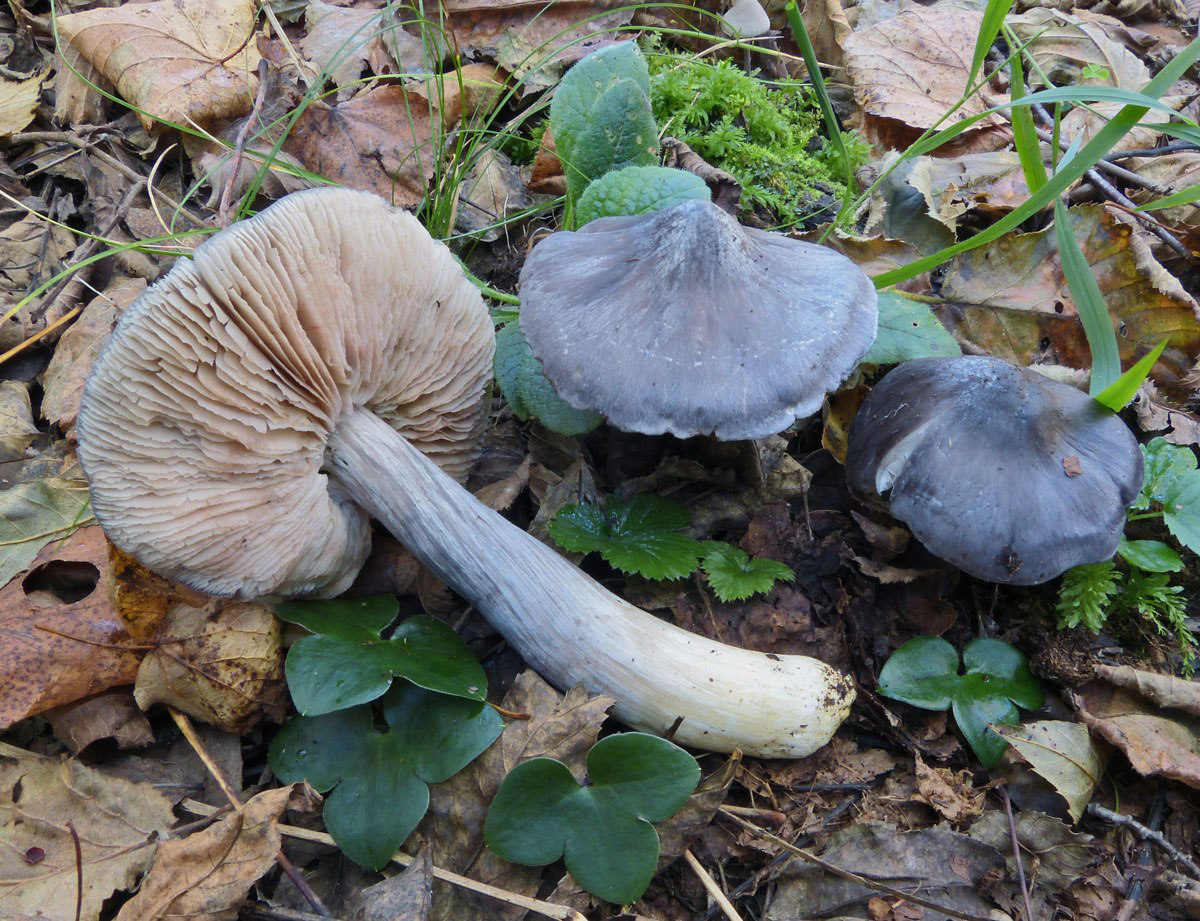

In [102]:
pic = load_img('/Users/sophie/Desktop/Mushrooms_Pictures/Test/Not_Poisonous/000_pIBnrKk4HoA.jpg')
pic.getpixel
pic_array = img_to_array(pic)
pic_array.shape
pic

In [111]:
train_path = '/Users/sophie/Desktop/Mushrooms_Pictures/Train'
valid_path = '/Users/sophie/Desktop/Mushrooms_Pictures/Validation'
test_path = '/Users/sophie/Desktop/Mushrooms_Pictures/Test'

image_gen = ImageDataGenerator() # create a data generator

training_generator = image_gen.flow_from_directory(
    train_path,
    classes=['Poisonous', 'Not_Poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size = 100
)
validation_generator = image_gen.flow_from_directory(
    valid_path,
    classes=['Poisonous', 'Not_Poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size = 50
)
test_generator = image_gen.flow_from_directory(
    test_path,
    classes=['Poisonous', 'Not_Poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=1
)
X_train, y_train = training_generator.next()
print(f'This is the X_train: Batch shape=%s, min=%.3f, max=%.3f' % (X_train.shape, X_train.min(), X_train.max()))
print(y_train)

X_validation, y_validation = validation_generator.next()
print(f'This is the X_validation: Batch shape=%s, min=%.3f, max=%.3f' % (X_validation.shape, X_validation.min(), X_validation.max()))
print(y_validation)

X_test, y_test = test_generator.next()
print(f'This is the X_test: Batch shape=%s, min=%.3f, max=%.3f' % (X_test.shape, X_test.min(), X_test.max()))
print(y_test)


Found 3599 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Found 1343 images belonging to 2 classes.
This is the X_train: Batch shape=(100, 256, 256, 3), min=0.000, max=255.000
[0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1.]
This is the X_validation: Batch shape=(50, 256, 256, 3), min=0.000, max=255.000
[1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
This is the X_test: Batch shape=(1, 256, 256, 3), min=0.000, max=255.000
[1.]


# STEP 2: VISUALIZE DATA

In [112]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


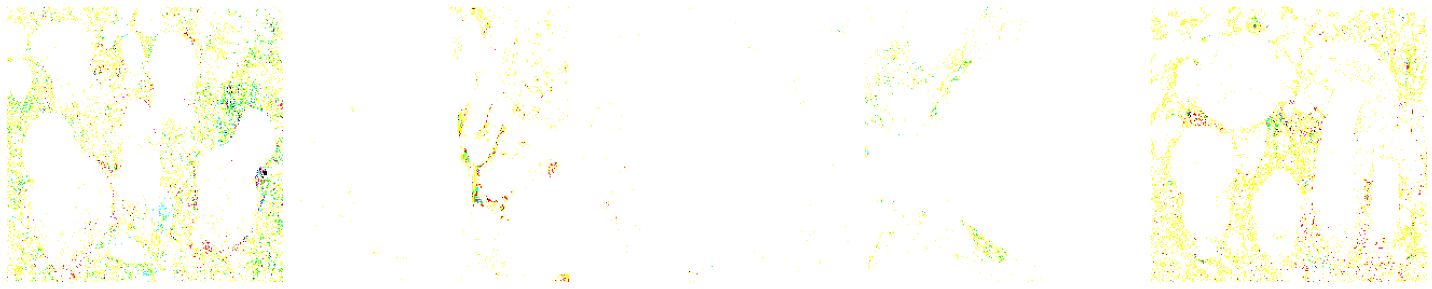

[0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 1.]


In [109]:
plotImages(X_train)
print(y_train)

# STEP 3: DATA PREPARATION

# STEP 4: TRAIN THE MODEL

# STEP 5: EVALUATE THE MODEL